In [9]:
import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
startdate = "2020-04-01"
variables = ["deaths", "cases"]
states = ["Massachusetts", "New York"]
df = data.read_data(startdate, states, variables)


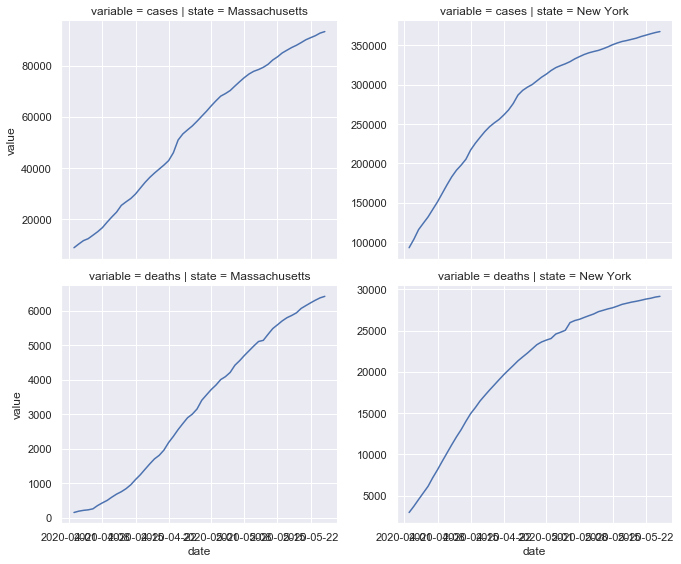

In [11]:
plt.style.use('seaborn-darkgrid')
sns.set()
g = sns.FacetGrid(df, col='state', row='variable', sharex=True, sharey=False, height=4, aspect=1.2)
g = g.map(plt.plot, "date", "value")

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def read_cdc_data1(start_date, states):
    dt = (pd.read_csv("https://data.cdc.gov/api/views/xkkf-xrst/rows.csv?accessType=DOWNLOAD&bom=true&format=true",
                      na_values=['(NA)', ''], thousands=',', parse_dates=['Week Ending Date']).fillna(0)
          .query("Outcome == 'All causes'")
          .query("Type == 'Predicted (weighted)'")
          .rename(columns={'Excess Lower Estimate': 'excessl', 'Excess Higher Estimate': "excessh", 'Week Ending Date': 'date', 'State': 'state'})
          .query("date > '" + start_date + "'")
          .query("state in @states")
          .set_index('date', drop=True)
         .pivot(columns='state', values=['excessl', 'excessh'])
           .resample('D')
           .interpolate(method='cubic')
          .stack(level=1)
          .reset_index(level=1)
          .reset_index('date')
           .melt(id_vars=['date', 'state'])
          )
    return dt

startdate = "2020-04-01"
variables = ["deaths", "cases"]
states = ["Massachusetts", "New York"]
d = read_cdc_data1(startdate, states)


In [14]:
d

,date,state,variable,value
0,2020-04-04,Massachusetts,excessl,286.000000
1,2020-04-04,New York,excessl,1508.000000
2,2020-04-05,Massachusetts,excessl,339.396890
3,2020-04-05,New York,excessl,1735.920700
4,2020-04-06,Massachusetts,excessl,401.028183
...,...,...,...,...
139,2020-05-07,New York,excessh,1166.481050
140,2020-05-08,Massachusetts,excessh,829.392420
141,2020-05-08,New York,excessh,1168.668805
142,2020-05-09,Massachusetts,excessh,811.000000


In [13]:
b.head()

excessl      excessh
date       state                                  
2020-04-04 Massachusetts   286.000000   366.000000
           New York       1508.000000  1630.000000
2020-04-05 Massachusetts   339.396890   418.765598
           New York       1735.920700  1857.802915
2020-04-06 Massachusetts   401.028183   480.239067